In [2]:
%matplotlib inline  
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy

f_meas = "/sps/lsst/users/lsstprod/hsc/SSP_UDEEP_COSMOS/utils/jointcal/Photometry_initial_chi2-0_g-meas.csv"
f_ref = "/sps/lsst/users/lsstprod/hsc/SSP_UDEEP_COSMOS/utils/jointcal/Photometry_initial_chi2-0_g-ref.csv"

nt_meas = ascii.read(f_meas)
nt_ref = ascii.read(f_ref)

In [3]:
nt_meas

xccd,yccd,mag,instFlux,instFluxError,flux,fluxError,transformedFlux,transformedFluxErr,fflux,mjd,color,fsindex,ra,dec,chi2,nm,chip,visit
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,int64,int64,int64
1296.76,91.2338,22.2441,27137.4,411.955,1.23887e-09,1.88109e-11,1.23887e-09,1.88064e-11,1.23887e-09,56979.5,0,-1,0.166783,-0.652049,0.0,7,0,11690
437.356,138.965,19.3224,406457.0,540.576,1.85554e-08,2.54405e-11,1.85554e-08,2.46782e-11,1.85554e-08,56979.5,0,-1,0.168296,-0.688935,0.0,3,0,11690
1194.24,170.625,22.8121,16432.1,409.201,7.50153e-10,1.86824e-11,7.50153e-10,1.86807e-11,7.50153e-10,56979.5,0,-1,0.170313,-0.65641,0.0,1,0,11690
1812.63,258.518,21.9988,33075.3,409.468,1.50994e-09,1.86996e-11,1.50994e-09,1.86929e-11,1.50994e-09,56979.5,0,-1,0.174748,-0.629546,0.0,6,0,11690
1980.17,295.028,22.6569,18552.0,403.188,8.46931e-10,1.84083e-11,8.46931e-10,1.84062e-11,8.46931e-10,56979.5,0,-1,0.176526,-0.622225,0.0,7,0,11690
1903.34,321.028,22.266,25509.1,406.401,1.16453e-09,1.85569e-11,1.16453e-09,1.85529e-11,1.16453e-09,56979.5,0,-1,0.177655,-0.625549,0.0,6,0,11690
1200.12,354.39,21.4187,58712.7,424.276,2.68033e-09,1.93895e-11,2.68033e-09,1.93689e-11,2.68033e-09,56979.5,0,-1,0.178654,-0.655997,0.0,8,0,11690
2000.03,387.807,22.1885,28932.9,405.7,1.32084e-09,1.85261e-11,1.32084e-09,1.85209e-11,1.32084e-09,56979.5,0,-1,0.18076,-0.621284,0.0,5,0,11690
1213.7,396.721,22.2176,28309.1,413.605,1.29236e-09,1.88866e-11,1.29236e-09,1.88817e-11,1.29236e-09,56979.5,0,-1,0.180583,-0.655373,0.0,8,0,11690


In [11]:
filt = (nt_meas['mag']<23) & (nt_meas['xccd']>1000)
nt_meas['mag'][filt]
#len(nt_meas['mag'])
filt

array([ True, False,  True, ..., False, False, False], dtype=bool)

In [4]:
nt_ref

ra,dec,mag,color,refFlux,refFluxErr,fittedFlux,fittedFluxErr,fsindex,chi2,nm
float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,int64
0.168296176,-0.688935115,19.3223998,0,1.91101408e-08,9.62622605e-11,1.85554383e-08,2.54405302e-11,-1,33.2053489,3
0.170312946,-0.656410485,22.8121251,0,6.1436314e-10,2.66310002e-11,7.50153201e-10,1.86823576e-11,-1,25.9992611,1
0.174748102,-0.629546193,21.9988489,0,1.57299627e-09,4.28430735e-11,1.50994371e-09,1.8699636e-11,-1,2.16592874,6
0.176525935,-0.622225306,22.6568808,0,7.37189692e-10,3.08434377e-11,8.46931124e-10,1.84083381e-11,-1,12.659475,7
0.177654572,-0.625548989,22.2659559,0,7.87273534e-10,3.41240956e-11,1.16453177e-09,1.85569482e-11,-1,122.223623,6
0.178653515,-0.655996976,21.4186663,0,2.77088193e-09,5.71792394e-11,2.68033191e-09,1.9389472e-11,-1,2.50784283,8
0.180760244,-0.62128416,22.1884897,0,8.05224631e-10,3.80623598e-11,1.32083632e-09,1.85260896e-11,-1,183.507611,5
0.180583482,-0.655373199,22.2175525,0,1.27461375e-09,4.00914731e-11,1.29235575e-09,1.88866432e-11,-1,0.19583994,8
0.189884652,-0.627154109,22.2979478,0,1.00107941e-09,4.49469777e-11,1.17547791e-09,1.85990811e-11,-1,15.0551299,5


0.0 3.38219018365e-10 1.6189792e-10 1.0626018683e-09


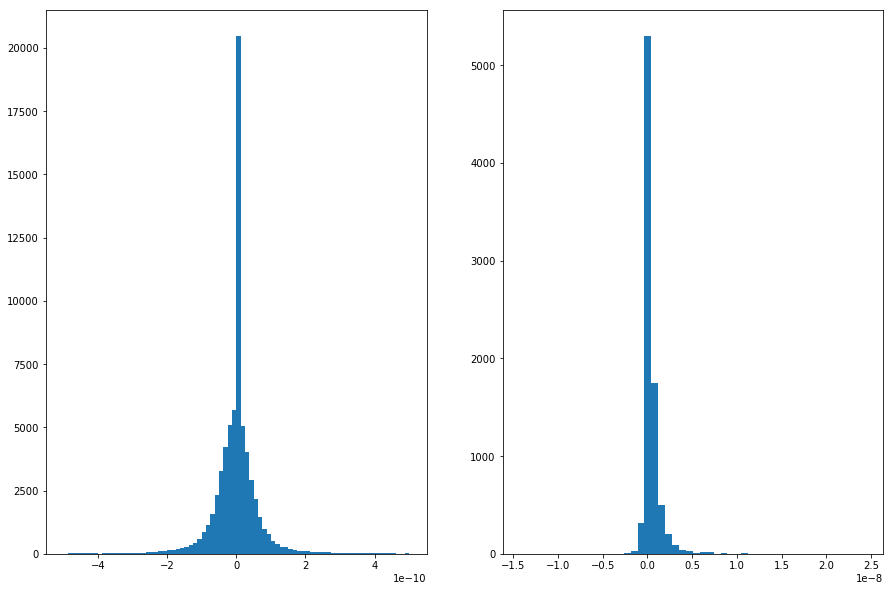

In [4]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15, 10))
_ = ax0.hist(nt_meas['fflux']-nt_meas['transformedFlux'], bins=80, range=[-0.5e-9, 0.5e-9])
_ = ax1.hist(nt_ref['fittedFlux']-nt_ref['refFlux'], bins=50)

av_meas = numpy.median(nt_meas['fflux']-nt_meas['transformedFlux'])
sg_meas = numpy.std(nt_meas['fflux']-nt_meas['transformedFlux'])
av_ref = numpy.median(nt_ref['fittedFlux']-nt_ref['refFlux'])
sg_ref = numpy.std(nt_ref['fittedFlux']-nt_ref['refFlux'])

print(av_meas, sg_meas, av_ref, sg_ref)

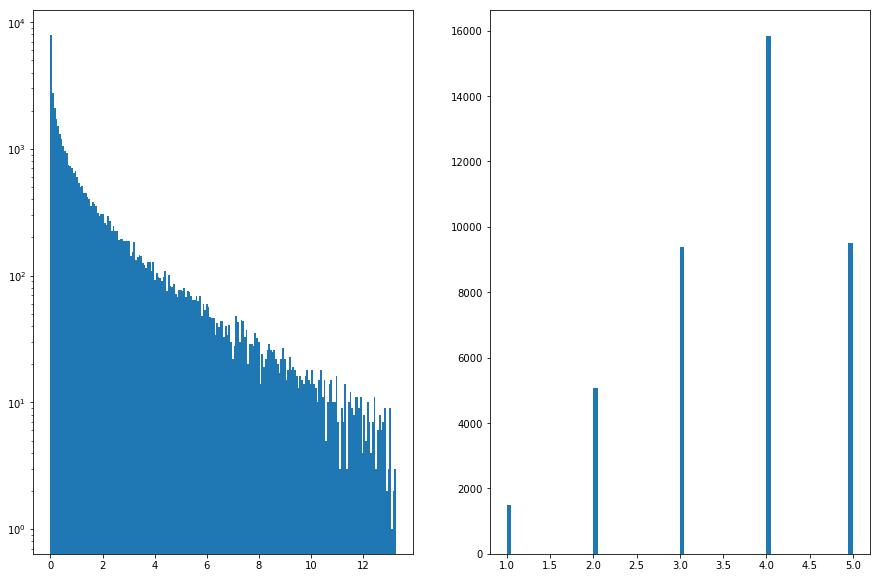

In [21]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15, 10))
_ = ax0.hist(nt_meas['chi2'], bins=200)
ax0.set_yscale('log')
_ = ax1.hist(nt_meas['nm'], bins=80)

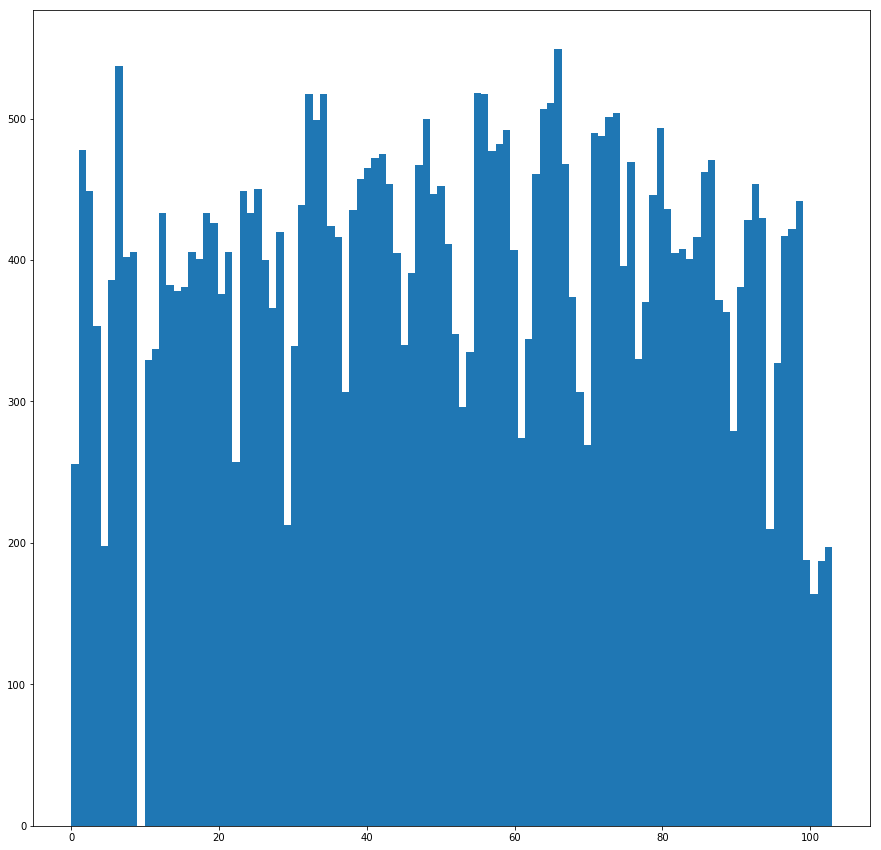

In [6]:
fig, (ax0) = plt.subplots(ncols=1, figsize=(15, 15))
_ = ax0.hist(nt_meas['chip'], bins=104)

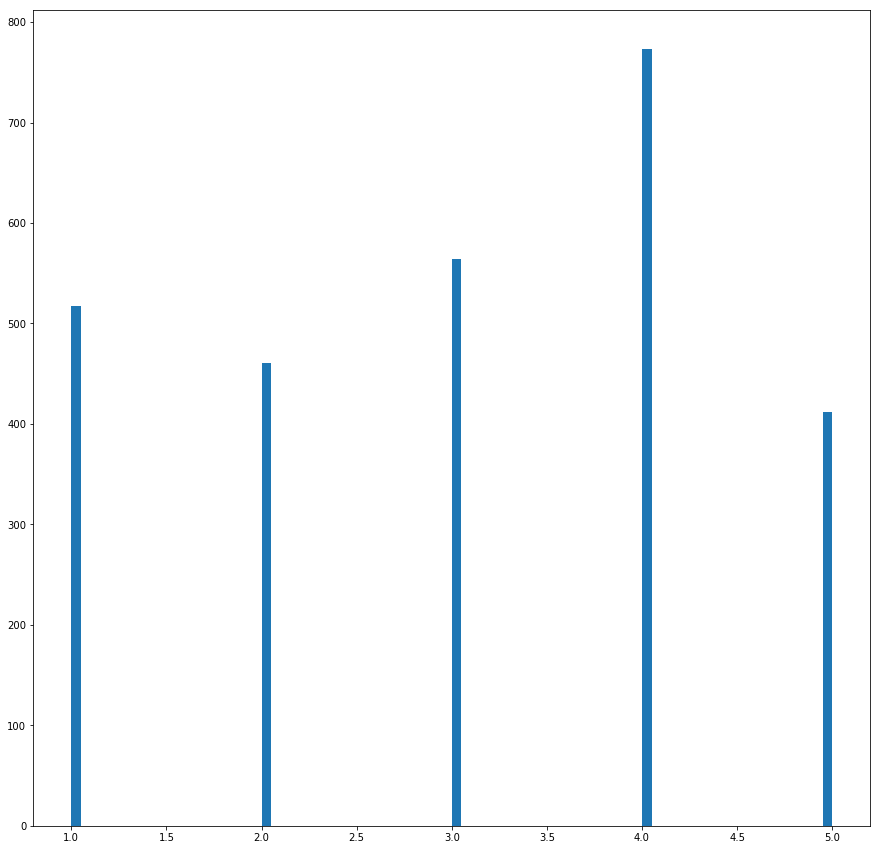

In [22]:
fig, (ax0) = plt.subplots(ncols=1, figsize=(15, 15))
_ = ax0.hist(nt_ref['nm'], bins=80)
#ax0.set_yscale('log')

In [8]:
sel = nt_ref['nm'] == 0
nt_ref[sel]

ra,dec,mag,color,refFlux,refFluxErr,fittedFlux,fittedFluxErr,fsindex,chi2,nm
float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,int64
0.400834525,0.70782352,20.7052281,0,3.06934874e-09,1.55196281e-11,3.06934874e-09,2.17293066e-11,12506,0.0,0
0.324569421,-0.590090489,22.509596,0,2.86331525e-10,8.66878673e-12,2.86331525e-10,1.90310965e-11,12652,0.0,0
0.292398529,0.746024463,22.2211987,0,6.92720547e-10,1.9391132e-11,6.92720547e-10,2.06341831e-11,13170,0.0,0


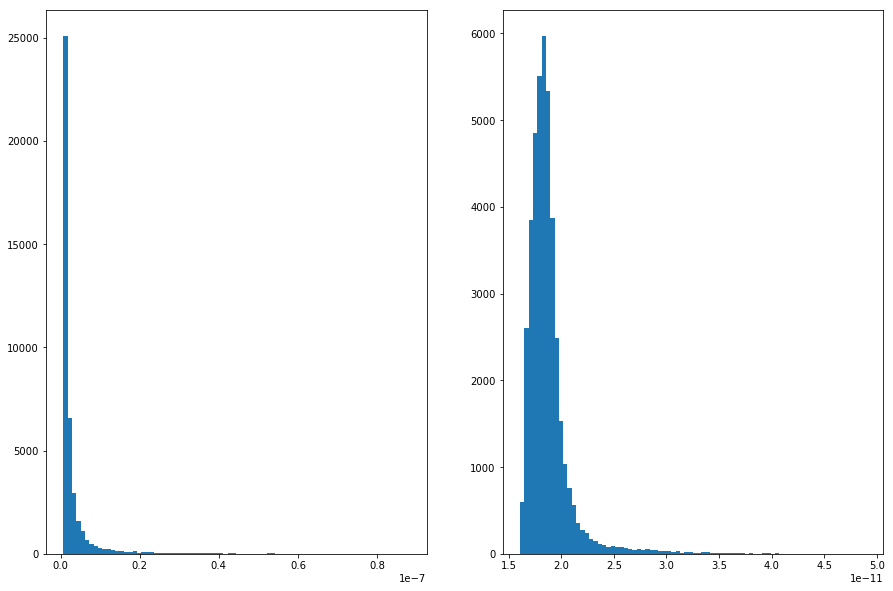

In [9]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15, 10))
_ = ax0.hist(nt_meas['flux'], bins=80)
_ = ax1.hist(nt_meas['fluxError'], bins=80)

In [10]:
sel = nt_meas['fluxError'] < 0.1e-10
nt_meas[sel]

xccd,yccd,mag,instFlux,instFluxError,flux,fluxError,transformedFlux,transformedFluxErr,fflux,mjd,color,fsindex,ra,dec,chi2,nm,chip,visit
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,int64,int64,int64


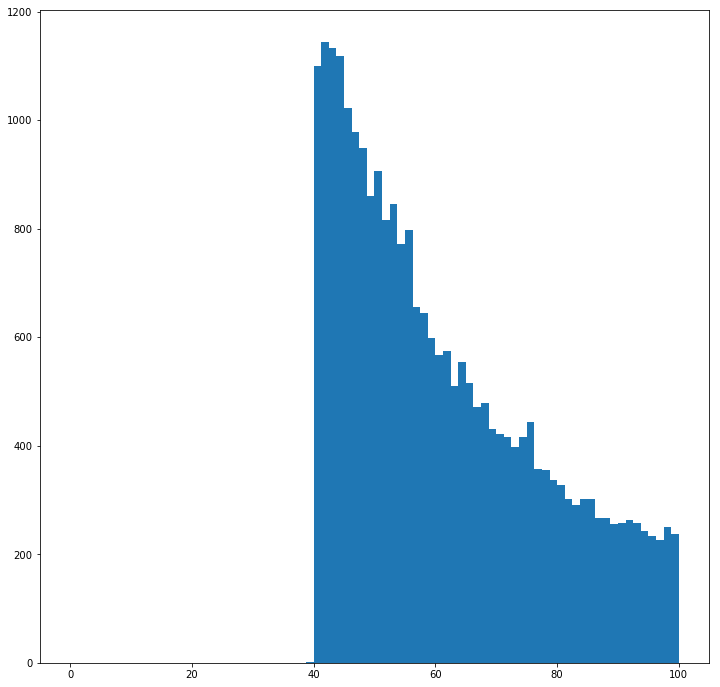

In [11]:
fig, (ax0) = plt.subplots(ncols=1, figsize=(12, 12))
_ = ax0.hist(nt_meas['flux']/nt_meas['fluxError'], bins=80, range=[0,100])

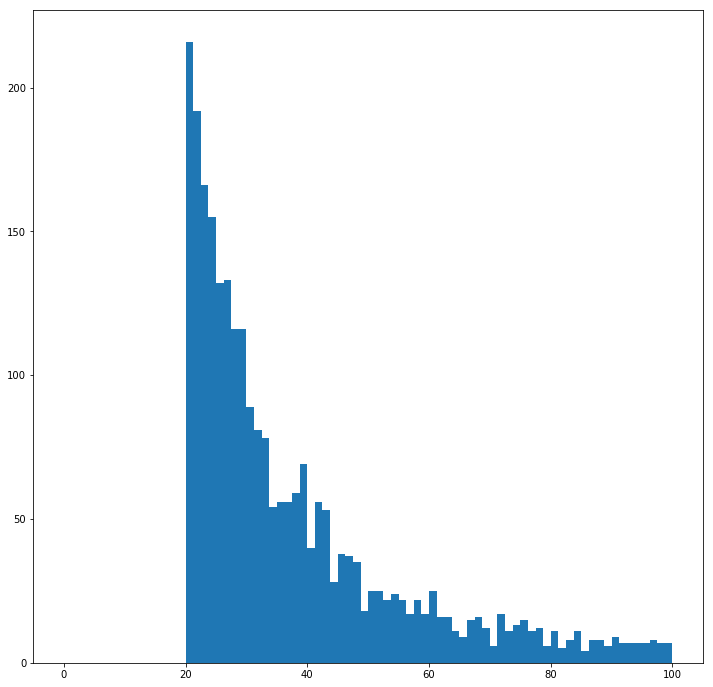

In [12]:
fig, (ax0) = plt.subplots(ncols=1, figsize=(12, 12))
_ = ax0.hist(nt_ref['refFlux']/nt_ref['refFluxErr'], bins=80, range=[0,100])